In [91]:
# !pip install -r ../requirements.txt --upgrade -q

In [92]:
import os
import sys

from pathlib import Path

PROJECT_PATH = os.path.abspath('..')
sys.path.append(PROJECT_PATH)


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm


from babel.numbers import format_currency
from bioinfokit.analys import stat
from IPython.display import display, Markdown
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import normaltest
from statsmodels.formula.api import ols



pd.options.display.max_columns = 500
default_figsize = (16, 5)
default_figsize_small = (16, 2.5)

dataset_path = Path(PROJECT_PATH) / 'data' / 'AmesHousing.csv'

In [93]:
valor = 1234.566789789
print(format_currency(valor, 'BRL', locale='pt_BR'))

R$ 1.234,57


In [94]:
# dicionario para mapeamento das colunas
nome_colunas_ptbr = {
    'Order': 'Ordem',
    'PID': 'IDPropriedade',
    'MS SubClass': 'SubClasseMS',
    'MS Zoning': 'ZoneamentoMS',
    'Lot Frontage': 'FrenteLote',
    'Lot Area': 'AreaLote',
    'Street': 'Rua',
    'Alley': 'Beco',
    'Lot Shape': 'FormaLote',
    'Land Contour': 'ContornoTerreno',
    'Utilities': 'Utilidades',
    'Lot Config': 'ConfiguracaoLote',
    'Land Slope': 'DecliveTerreno',
    'Neighborhood': 'Bairro',
    'Condition 1': 'Condicao1',
    'Condition 2': 'Condicao2',
    'Bldg Type': 'TipoConstrucao',
    'House Style': 'EstiloCasa',
    'Overall Qual': 'QualidadeGeral',
    'Overall Cond': 'CondicaoGeral',
    'Year Built': 'AnoConstrucao',
    'Year Remod/Add': 'AnoRemodelacao',
    'Roof Style': 'EstiloTelhado',
    'Roof Matl': 'MaterialTelhado',
    'Exterior 1st': 'Exterior1',
    'Exterior 2nd': 'Exterior2',
    'Mas Vnr Type': 'TipoRevestimento',
    'Mas Vnr Area': 'AreaRevestimento',
    'Exter Qual': 'QualidadeExterior',
    'Exter Cond': 'CondicaoExterior',
    'Foundation': 'Fundacao',
    'Bsmt Qual': 'QualidadePorao',
    'Bsmt Cond': 'CondicaoPorao',
    'Bsmt Exposure': 'ExposicaoPorao',
    'BsmtFin Type 1': 'TipoAcabamentoPorao1',
    'BsmtFin SF 1': 'AreaAcabamentoPorao1',
    'BsmtFin Type 2': 'TipoAcabamentoPorao2',
    'BsmtFin SF 2': 'AreaAcabamentoPorao2',
    'Bsmt Unf SF': 'AreaNaoAcabamentoPorao',
    'Total Bsmt SF': 'AreaTotalPorao',
    'Heating': 'Aquecimento',
    'Heating QC': 'QualidadeAquecimento',
    'Central Air': 'ArCentral',
    'Electrical': 'Eletrica',
    '1st Flr SF': 'Area1Andar',
    '2nd Flr SF': 'Area2Andar',
    'Low Qual Fin SF': 'AreaAcabamentoBaixaQualidade',
    'Gr Liv Area': 'AreaHabitavel',
    'Bsmt Full Bath': 'BanheirosCompletosPorao',
    'Bsmt Half Bath': 'BanheirosMeiaPorao',
    'Full Bath': 'BanheirosCompletos',
    'Half Bath': 'BanheirosMeia',
    'Bedroom AbvGr': 'Quartos',
    'Kitchen AbvGr': 'Cozinhas',
    'Kitchen Qual': 'QualidadeCozinha',
    'TotRms AbvGrd': 'TotalComodos',
    'Functional': 'Funcionalidade',
    'Fireplaces': 'Lareiras',
    'Fireplace Qu': 'QualidadeLareira',
    'Garage Type': 'TipoGaragem',
    'Garage Yr Blt': 'AnoConstrucaoGaragem',
    'Garage Finish': 'AcabamentoGaragem',
    'Garage Cars': 'CarrosGaragem',
    'Garage Area': 'AreaGaragem',
    'Garage Qual': 'QualidadeGaragem',
    'Garage Cond': 'CondicaoGaragem',
    'Paved Drive': 'EntradaPavimentada',
    'Wood Deck SF': 'AreaDeckMadeira',
    'Open Porch SF': 'AreaVarandaAberta',
    'Enclosed Porch': 'AreaVarandaFechada',
    '3Ssn Porch': 'AreaVaranda3Estacoes',
    'Screen Porch': 'AreaVarandaTela',
    'Pool Area': 'AreaPiscina',
    'Pool QC': 'QualidadePiscina',
    'Fence': 'Cerca',
    'Misc Feature': 'CaracteristicaExtra',
    'Misc Val': 'ValorExtra',
    'Mo Sold': 'MesVenda',
    'Yr Sold': 'AnoVenda',
    'Sale Type': 'TipoVenda',
    'Sale Condition': 'CondicaoVenda',
    'SalePrice': 'PrecoVenda'
}

# Dicionário para armazenar a descrição das colunas
descricao_colunas = {}

# refazer o for acima considerando os nomes das colunas em ingles mesmo
# e a descrição em portugues
for coluna in nome_colunas_ptbr:

    # Criar uma descrição concisa e informativa da coluna
    if coluna == 'Order':
        descricao = 'Número da linha no arquivo de dados (numérico - inteiro).'
    elif coluna == 'PID':
        descricao = 'Identificador único da propriedade (numérico - inteiro).'
    elif coluna == 'MS SubClass':
        descricao = 'Código numérico para o tipo de moradia (numérico - inteiro).'
    elif coluna == 'MS Zoning':
        descricao = 'Classificação geral de zoneamento da propriedade (categórico - nominal).'
    elif coluna == 'Lot Frontage':
        descricao = 'Frente do lote em pés lineares (numérico - inteiro).'
    elif coluna == 'Lot Area':
        descricao = 'Tamanho do lote em pés quadrados (numérico - inteiro).'
    elif coluna == 'Street':
        descricao = 'Tipo de rua de acesso à propriedade (categórico - nominal).'
    elif coluna == 'Alley':
        descricao = 'Tipo de acesso ao beco (categórico - nominal).'
    elif coluna == 'Lot Shape':
        descricao = 'Formato geral da propriedade (categórico - ordinal).'
    elif coluna == 'Land Contour':
        descricao = 'Planicidade do terreno (categórico - ordinal).'
    elif coluna == 'Utilities':
        descricao = 'Tipo de utilitários disponíveis (categórico - ordinal).'
    elif coluna == 'Lot Config':
        descricao = 'Configuração do lote (categórico - nominal).'
    elif coluna == 'Land Slope':
        descricao = 'Inclinação do terreno (categórico - ordinal).'
    elif coluna == 'Neighborhood':
        descricao = 'Bairro físico dentro dos limites da cidade de Ames (categórico - nominal).'
    elif coluna == 'Condition 1':
        descricao = 'Proximidade a várias condições (categórico - nominal).'
    elif coluna == 'Condition 2':
        descricao = 'Proximidade a várias condições (se houver mais de uma) (categórico - nominal).'
    elif coluna == 'Bldg Type':
        descricao = 'Tipo de moradia (categórico - nominal).'
    elif coluna == 'House Style':
        descricao = 'Estilo da moradia (categórico - nominal).'
    elif coluna == 'Overall Qual':
        descricao = 'Qualidade geral do material e do acabamento (categórico - ordinal).'
    elif coluna == 'Overall Cond':
        descricao = 'Avaliação geral da condição (categórico - ordinal).'
    elif coluna == 'Year Built':
        descricao = 'Ano original de construção (numérico - inteiro).'
    elif coluna == 'Year Remod/Add':
        descricao = 'Ano de remodelação (igual à data de construção se não houver remodelação ou adições) (numérico - inteiro).'
    elif coluna == 'Roof Style':
        descricao = 'Tipo de telhado (categórico - nominal).'
    elif coluna == 'Roof Matl':
        descricao = 'Tipo de cobertura do telhado (categórico - nominal).'
    elif coluna == 'Exterior 1st':
        descricao = 'Tipo de revestimento exterior (categórico - nominal).'
    elif coluna == 'Exterior 2nd':
        descricao = 'Tipo de revestimento exterior (se houver mais de um material) (categórico - nominal).'
    elif coluna == 'Mas Vnr Type':
        descricao = 'Tipo de revestimento de alvenaria (categórico - nominal).'
    elif coluna == 'Mas Vnr Area':
        descricao = 'Área de revestimento de alvenaria em pés quadrados (numérico - inteiro).'
    elif coluna == 'Exter Qual':
        descricao = 'Qualidade do material exterior (categórico - ordinal).'
    elif coluna == 'Exter Cond':
        descricao = 'Condição atual do material no exterior (categórico - ordinal).'
    elif coluna == 'Foundation':
        descricao = 'Tipo de fundação (categórico - nominal).'
    elif coluna == 'Bsmt Qual':
        descricao = 'Altura do porão (categórico - ordinal).'
    elif coluna == 'Bsmt Cond':
        descricao = 'Condição geral do porão (categórico - ordinal).'
    elif coluna == 'Bsmt Exposure':
        descricao = 'Paredes de porão de nível de caminhada ou jardim (categórico - ordinal).'
    elif coluna == 'BsmtFin Type 1':
        descricao = 'Qualidade do acabamento da área acabada do porão (categórico - ordinal).'
    elif coluna == 'BsmtFin SF 1':
        descricao = 'Pés quadrados acabados do tipo 1 (numérico - inteiro).'
    elif coluna == 'BsmtFin Type 2':
        descricao = 'Qualidade do acabamento da segunda área acabada (se houver) (categórico - ordinal).'
    elif coluna == 'BsmtFin SF 2':
        descricao = 'Pés quadrados acabados do tipo 2 (numérico - inteiro).'
    elif coluna == 'Bsmt Unf SF':
        descricao = 'Pés quadrados inacabados da área do porão (numérico - inteiro).'
    elif coluna == 'Total Bsmt SF':
        descricao = 'Pés quadrados totais da área do porão (numérico - inteiro).'
    elif coluna == 'Heating':
        descricao = 'Tipo de sistema de aquecimento (categórico - nominal).'
    elif coluna == 'Heating QC':
        descricao = 'Qualidade do sistema de aquecimento (categórico - ordinal).'
    elif coluna == 'Central Air':
        descricao = 'Ar condicionado central (categórico - binário).'
    elif coluna == 'Electrical':
        descricao = 'Sistema elétrico (categórico - ordinal).'
    elif coluna == '1st Flr SF':
        descricao = 'Pés quadrados do primeiro andar (numérico - inteiro).'
    elif coluna == '2nd Flr SF':
        descricao = 'Pés quadrados do segundo andar (numérico - inteiro).'
    elif coluna == 'Low Qual Fin SF':
        descricao = 'Pés quadrados acabados de baixa qualidade (todos os andares) (numérico - inteiro).'
    elif coluna == 'Gr Liv Area':
        descricao = 'Pés quadrados de área habitável acima do nível do solo (numérico - inteiro).'
    elif coluna == 'Bsmt Full Bath':
        descricao = 'Banheiros completos no porão (numérico - inteiro).'
    elif coluna == 'Bsmt Half Bath':
        descricao = 'Banheiros de meia no porão (numérico - inteiro).'
    elif coluna == 'Full Bath':
        descricao = 'Banheiros completos acima do nível do solo (numérico - inteiro).'
    elif coluna == 'Half Bath':
        descricao = 'Banheiros de meia acima do nível do solo (numérico - inteiro).'
    elif coluna == 'Bedroom AbvGr':
        descricao = 'Número de quartos acima do nível do solo (numérico - inteiro).'
    elif coluna == 'Kitchen AbvGr':
        descricao = 'Número de cozinhas (numérico - inteiro).'
    elif coluna == 'Kitchen Qual':
        descricao = 'Qualidade da cozinha (categórico - ordinal).'
    elif coluna == 'TotRms AbvGrd':
        descricao = 'Número total de cômodos acima do nível do solo (não inclui banheiros) (numérico - inteiro).'
    elif coluna == 'Functional':
        descricao = 'Classificação da funcionalidade da casa (categórico - ordinal).'
    elif coluna == 'Fireplaces':
        descricao = 'Número de lareiras (numérico - inteiro).'
    elif coluna == 'Fireplace Qu':
        descricao = 'Qualidade da lareira (categórico - ordinal).'
    elif coluna == 'Garage Type':
        descricao = 'Localização da garagem (categórico - nominal).'
    elif coluna == 'Garage Yr Blt':
        descricao = 'Ano de construção da garagem (numérico - inteiro).'
    elif coluna == 'Garage Finish':
        descricao = 'Acabamento interior da garagem (categórico - ordinal).'
    elif coluna == 'Garage Cars':
        descricao = 'Tamanho da garagem em capacidade de carros (numérico - inteiro).'
    elif coluna == 'Garage Area':
        descricao = 'Tamanho da garagem em pés quadrados (numérico - inteiro).'
    elif coluna == 'Garage Qual':
        descricao = 'Qualidade da garagem (categórico - ordinal).'
    elif coluna == 'Garage Cond':
        descricao = 'Condição da garagem (categórico - ordinal).'
    elif coluna == 'Paved Drive':
        descricao = 'Entrada pavimentada (categórico - ordinal).'
    elif coluna == 'Wood Deck SF':
        descricao = 'Área do deck de madeira em pés quadrados (numérico - inteiro).'
    elif coluna == 'Open Porch SF':
        descricao = 'Área da varanda aberta em pés quadrados (numérico - inteiro).'
    elif coluna == 'Enclosed Porch':
        descricao = 'Área da varanda fechada em pés quadrados (numérico - inteiro).'
    elif coluna == '3Ssn Porch':
        descricao = 'Área da varanda de 3 estações em pés quadrados (numérico - inteiro).'
    elif coluna == 'Screen Porch':
        descricao = 'Área da varanda de tela em pés quadrados (numérico - inteiro).'
    elif coluna == 'Pool Area':
        descricao = 'Área da piscina em pés quadrados (numérico - inteiro).'
    elif coluna == 'Pool QC':
        descricao = 'Qualidade da piscina (categórico - ordinal).'
    elif coluna == 'Fence':
        descricao = 'Qualidade da cerca (categórico - ordinal).'
    elif coluna == 'Misc Feature':
        descricao = 'Característica extra (categórico - nominal).'
    elif coluna == 'Misc Val':
        descricao = 'Valor da característica extra (numérico - inteiro).'
    elif coluna == 'Mo Sold':
        descricao = 'Mês em que a casa foi vendida (numérico - inteiro).'
    elif coluna == 'Yr Sold':
        descricao = 'Ano em que a casa foi vendida (numérico - inteiro).'
    elif coluna == 'Sale Type':
        descricao = 'Tipo de venda (categórico - nominal).'
    elif coluna == 'Sale Condition':
        descricao = 'Condição da venda (categórico - nominal).'
    elif coluna == 'SalePrice':
        descricao = 'Preço de venda (numérico - inteiro).'
    else:
        descricao = 'Descrição não disponível.'

    # Adicionar a descrição ao dicionário
    descricao_colunas[coluna] = descricao

# Criar um DataFrame a partir do dicionário de descrições
df_descricao = pd.DataFrame(descricao_colunas.items(), columns=['Coluna', 'Descrição'])
df_descricao.columns = [coluna.replace(' ', '') for coluna in df_descricao.columns]

df = pd.read_csv(dataset_path)
df.columns = [coluna.replace(' ', '') for coluna in df.columns]
df.head()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Análise Exploratória do Dados

## Preço de Venda

In [95]:
df_preco_venda = df['SalePrice'].describe().to_frame().T
nulos = df['SalePrice'].isna().sum()

# exibir a d3escritiva e nulos
display(df_preco_venda)

# escrever uma pequena análise a respeito 
display(Markdown(f"""
O preço de venda das propriedades varia de R\\${df['SalePrice'].min()} a R\\${df['SalePrice'].max()}, com uma média de R\\${df['SalePrice'].mean():,.2f} e mediana de R\\${df['SalePrice'].median():,.2f}.
O desvio padrão é de R\\${df['SalePrice'].std():,.2f}.
Não existem valores nulos.
"""))



,count,mean,std,min,25%,50%,75%,max
SalePrice,2930.0,180796.060068,79886.692357,12789.0,129500.0,160000.0,213500.0,755000.0



O preço de venda das propriedades varia de R\$12789 a R\$755000, com uma média de R\$180,796.06 e mediana de R\$160,000.00.
O desvio padrão é de R\$79,886.69.
Não existem valores nulos.


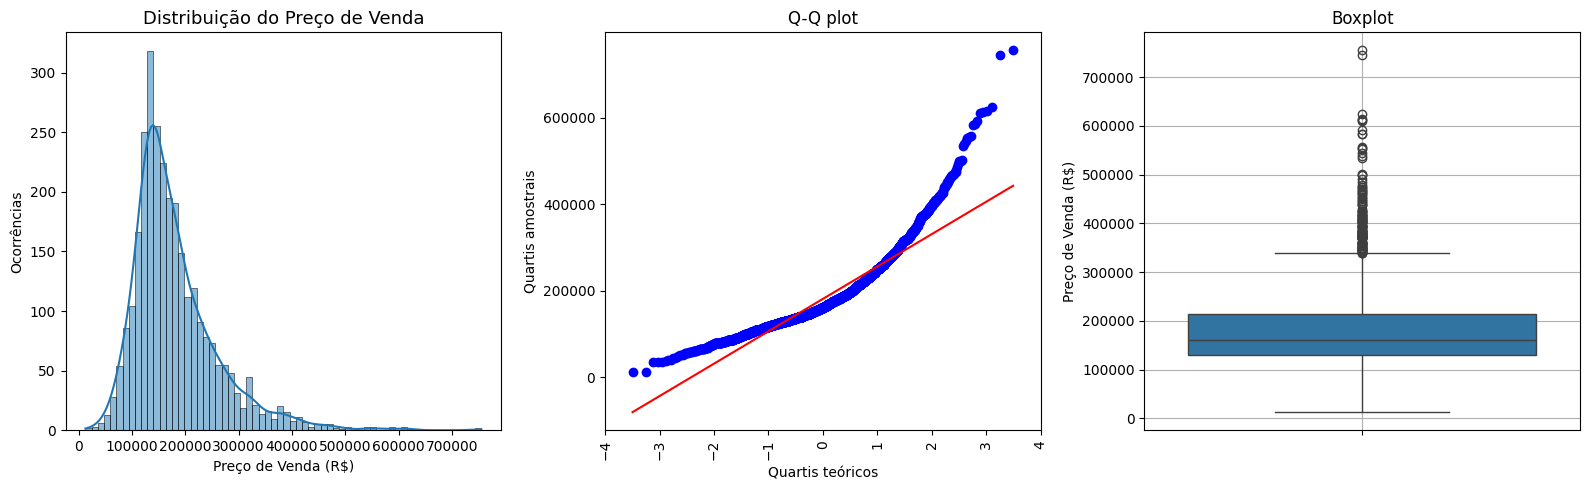

Shapiro-Wilk para a distribuição original:
Estatística=0.876, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)


In [96]:
plt.figure(figsize=default_figsize)

# Subplot 1: histograma
plt.subplot(1, 3, 1)
sns.histplot(df['SalePrice'], kde=True)
plt.title(r'Distribuição do Preço de Venda', fontsize=13)
plt.xlabel(r"Preço de Venda (R$)")
plt.ylabel('Ocorrências')

# Subplot 2: QQ-plot
plt.subplot(1, 3, 2)
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.xticks(ticks=np.arange(-4, 5, 1))
# girar xaxis
plt.xticks(rotation=90)
plt.title('Q-Q plot')
plt.xlabel('Quartis teóricos')
plt.ylabel('Quartis amostrais')

# Subplot 3: Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=df['SalePrice'])
plt.title('Boxplot')
plt.ylabel('Preço de Venda (R$)')
plt.xlabel('')
plt.grid(True)

plt.tight_layout()
plt.show()

# Teste de Shapiro-Wilk 
s, p = shapiro(df['SalePrice'])
print('Shapiro-Wilk para a distribuição original:')
print('Estatística=%.3f, p=%.3f' % (s, p))
alpha = 0.05
if p > alpha:
    print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
else:
    print('Amostra não parece ser normalmente distribuída (rejeita H0)')

## Bairro

In [97]:
df_counts = df['Neighborhood'].value_counts(dropna=False).to_frame().rename(columns={'count':'Ocorrências'})
nulos = df['Neighborhood'].isna().sum()

top = 5
top_perc = df_counts[:top].sum().iloc[0]/df_counts.sum().iloc[0]

top_bairros = list(df_counts[:top].index)
total_sales_top_perc = df[df['Neighborhood'].isin(top_bairros)]['SalePrice'].sum()/df['SalePrice'].sum()

# exibir a descritiva
display(Markdown(f"""
**Tipo de Variável**: Categórica
"""))

display(Markdown(f"""
**Ocorrências por Bairro**
"""))
display(df_counts)

# escrever uma pequena análise a respeito
display(Markdown(f"""
O bairro com maior número de ocorrências é **NAmes** com **443** registros.
Existem **28** bairros diferentes.
Existem **0** valores nulos.
Os top {top_bairros} bairros com maior número de ocorrências representam **{top_perc:.2%}** das observações e **{total_sales_top_perc:.2%}** dos valores negociados.
"""))


**Tipo de Variável**: Categórica



**Ocorrências por Bairro**


,Ocorrências
Neighborhood,
NAmes,443
CollgCr,267
OldTown,239
Edwards,194
Somerst,182
NridgHt,166
Gilbert,165
Sawyer,151
NWAmes,131



O bairro com maior número de ocorrências é **NAmes** com **443** registros.
Existem **28** bairros diferentes.
Existem **0** valores nulos.
Os top ['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst'] bairros com maior número de ocorrências representam **45.22%** das observações e **40.58%** dos valores negociados.


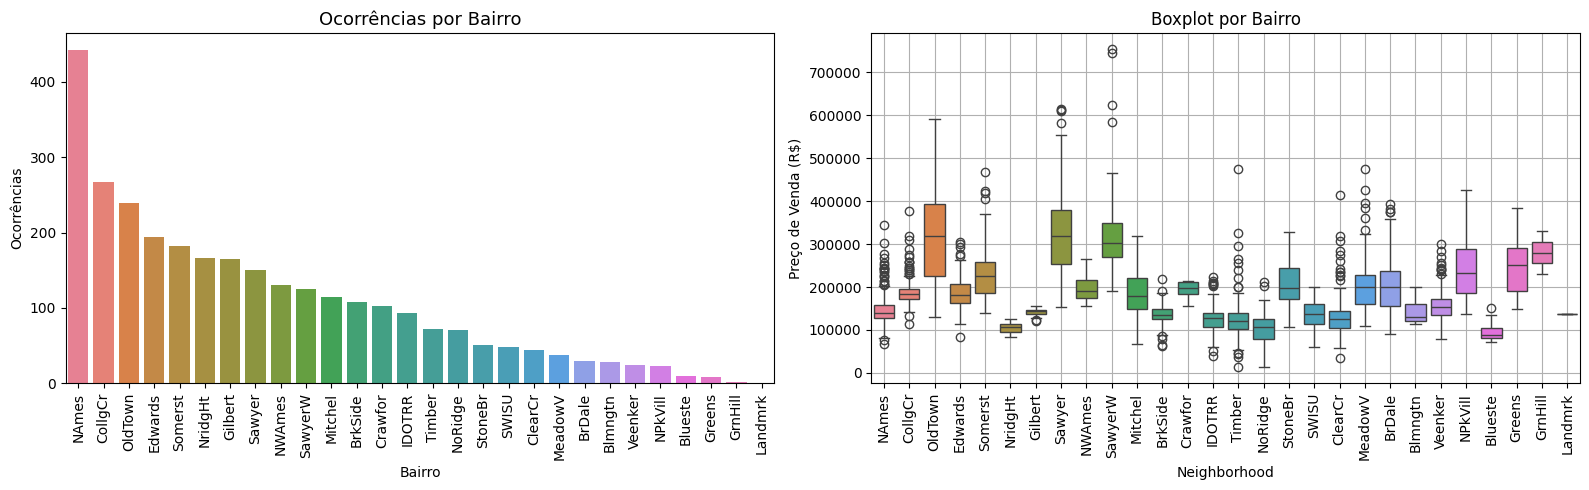

In [98]:
fig, ax = plt.subplots(1, 2, figsize=default_figsize)

# Subplot 1: histograma por bairro
plt.subplot(1, 2, 1)
sns.barplot(x='Neighborhood', y='Ocorrências', data=df_counts, ax=ax[0], hue='Neighborhood')
plt.title(r'Ocorrências por Bairro', fontsize=13)
plt.xlabel(r"Bairro")
plt.ylabel('Ocorrências')
plt.xticks(rotation=90)

# # Subplot 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, ax=ax[1], hue='Neighborhood')
plt.title('Boxplot por Bairro')
plt.ylabel('Preço de Venda (R$)')
plt.xlabel('Neighborhood')
plt.xticks(ticks=range(len(df_counts.index)), labels=df_counts.index, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

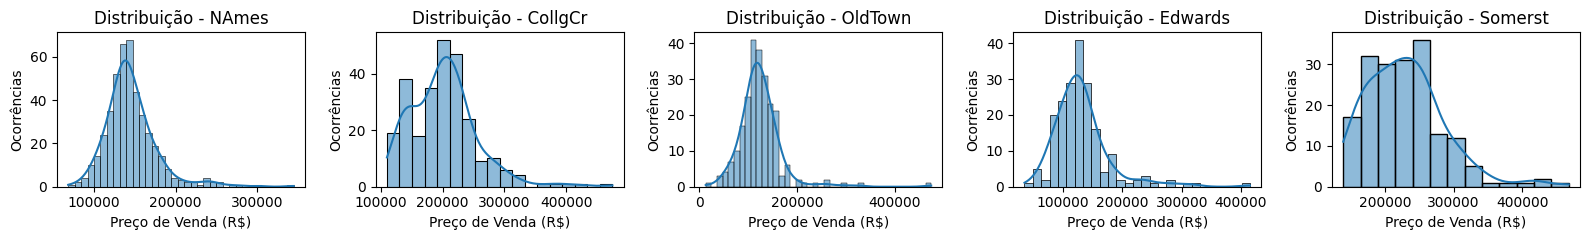

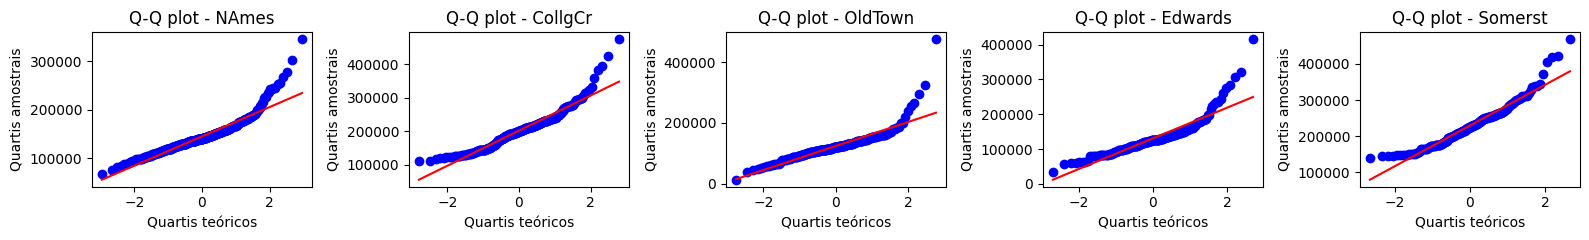

#### Shapiro - Bairros

Shapiro-Wilk para a distribuição do bairro NAmes:
Estatística=0.893, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do bairro CollgCr:
Estatística=0.928, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do bairro OldTown:
Estatística=0.800, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do bairro Edwards:
Estatística=0.837, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do bairro Somerst:
Estatística=0.939, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)


#### Kolmogorov-Smirnov - Bairros

Kolmogorov-Smirnov para a distribuição do bairro NAmes:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do bairro CollgCr:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do bairro OldTown:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do bairro Edwards:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do bairro Somerst:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)


In [99]:
# imprimir o histograma e distribuição de cada um dos top bairros selecionados
fig, ax = plt.subplots(1, 5, figsize=default_figsize_small)

for i, categoria in enumerate(top_bairros):
    plt.subplot(1, 5, i+1)
    sns.histplot(df[df['Neighborhood'] == categoria]['SalePrice'], kde=True)
    plt.title(f'Distribuição - {categoria}')
    plt.xlabel('Preço de Venda (R$)')
    plt.ylabel('Ocorrências')

plt.tight_layout()
plt.show()

# fazer o qq plot para cada um dos top bairros selecionados
fig, ax = plt.subplots(1, 5, figsize=default_figsize_small)

for i, categoria in enumerate(top_bairros):
    plt.subplot(1, 5, i+1)
    stats.probplot(df[df['Neighborhood'] == categoria]['SalePrice'], dist="norm", plot=plt)
    plt.title(f'Q-Q plot - {categoria}')
    plt.xlabel('Quartis teóricos')
    plt.ylabel('Quartis amostrais')

plt.tight_layout()
plt.show()

# Teste de Shapiro-Wilk para cada um dos top bairros selecionados
display(Markdown('#### Shapiro - Bairros'))
for categoria in top_bairros:
    s, p = shapiro(df[df['Neighborhood'] == categoria]['SalePrice'])
    print(f'Shapiro-Wilk para a distribuição do bairro {categoria}:')
    print(f'Estatística={s:.3f}, p={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
    else:
        print('Amostra não parece ser normalmente distribuída (rejeita H0)')


# Teste de Kolmogorov-Smirnov para cada um dos top bairros selecionados
display(Markdown('#### Kolmogorov-Smirnov - Bairros'))
for categoria in top_bairros:
    s, p = stats.kstest(df[df['Neighborhood'] == categoria]['SalePrice'], 'norm')
    print(f'Kolmogorov-Smirnov para a distribuição do bairro {categoria}:')
    print(f'Estatística={s:.3f}, p={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
    else:
        print('Amostra não parece ser normalmente distribuída (rejeita H0)')



## Inclinação do Terreno


**Tipo de Variável**: Categórica Ordinal



**Ocorrências por Inclinação do Terreno**


,Ocorrências
LandSlope,
Gtl,2789
Mod,125
Sev,16



**Gtl (Gentle):** Indica uma inclinação suave ou leve. O terreno é relativamente plano, apresentando uma declividade reduzida. É o tipo de área onde é mais fácil construir e implantar projetos agrícolas, pois o escoamento superficial de água é mais lento e a terra tende a ser mais estável.

**Mod (Moderate):** Refere-se a uma inclinação moderada. Aqui o terreno já apresenta uma inclinação perceptível, o que exige mais cuidados em construções e no uso do solo (por exemplo, técnicas de terraceamento ou controle de erosão). Ainda é possível utilizar esse tipo de relevo para agricultura, construção e outras atividades, porém com planejamento mais criterioso.

**Sev (Severe):** Significa uma inclinação acentuada. Trata-se de terrenos bastante íngremes, onde as atividades agrícolas, de construção e até deslocamento são dificultadas. Nessas áreas, existe maior risco de erosão, deslizamentos e outros problemas geotécnicos, sendo necessário adotar medidas específicas para estabilização do solo e drenagem, ou até mesmo evitar determinadas intervenções.


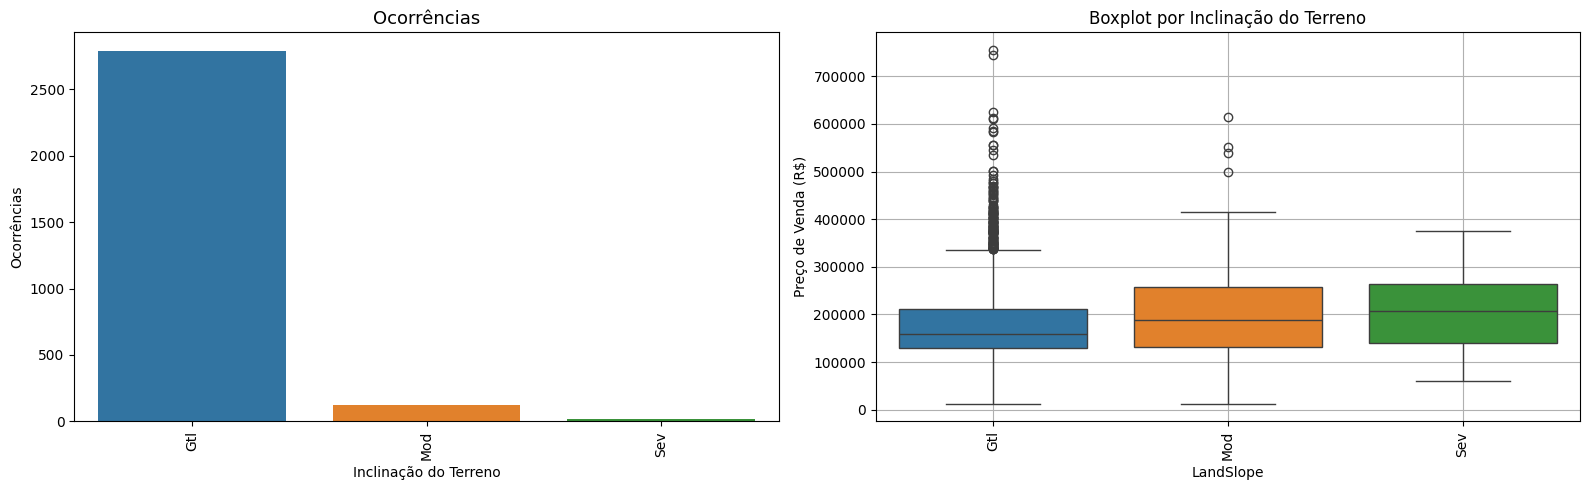

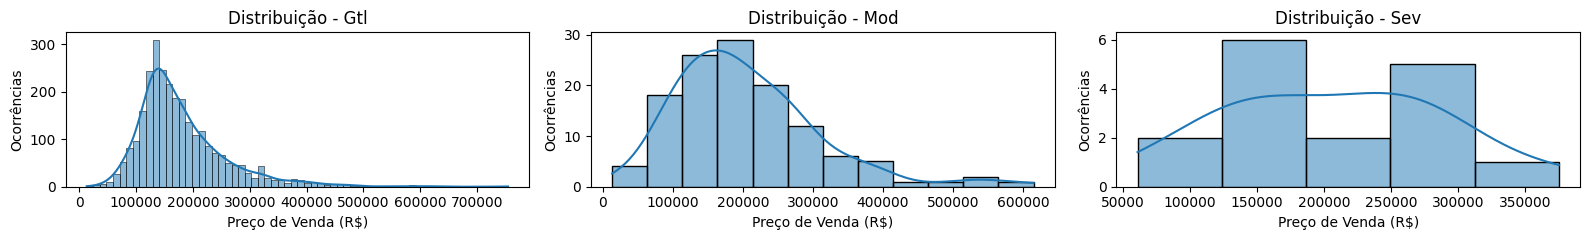

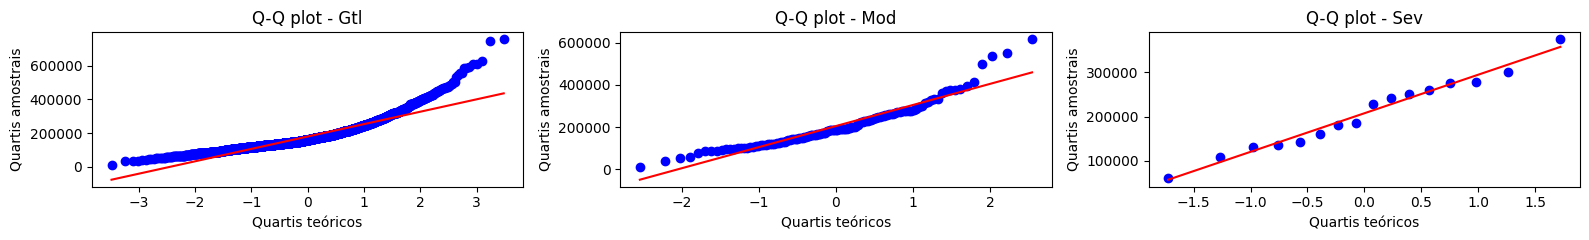

#### Shapiro - Inclinação do Terreno

Shapiro-Wilk para a distribuição da inclinação Gtl:
Estatística=0.874, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição da inclinação Mod:
Estatística=0.913, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição da inclinação Sev:
Estatística=0.979, p=0.951
Amostra parece ser normalmente distribuída (falha em rejeitar H0)


#### Kolmogorov-Smirnov - Inclinação do Terreno

Kolmogorov-Smirnov para a distribuição da inclinação Gtl:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição da inclinação Mod:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição da inclinação Sev:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)


In [100]:
df_counts = df['LandSlope'].value_counts(dropna=False).to_frame().rename(columns={'count':'Ocorrências'})
nulos = df['LandSlope'].isna().sum()

# exibir a descritiva
display(Markdown(f"""
**Tipo de Variável**: Categórica Ordinal
"""))

display(Markdown(f"""
**Ocorrências por Inclinação do Terreno**
"""))
display(df_counts)

# escrever uma pequena análise a respeito
display(Markdown(f"""
**Gtl (Gentle):** Indica uma inclinação suave ou leve. O terreno é relativamente plano, apresentando uma declividade reduzida. É o tipo de área onde é mais fácil construir e implantar projetos agrícolas, pois o escoamento superficial de água é mais lento e a terra tende a ser mais estável.

**Mod (Moderate):** Refere-se a uma inclinação moderada. Aqui o terreno já apresenta uma inclinação perceptível, o que exige mais cuidados em construções e no uso do solo (por exemplo, técnicas de terraceamento ou controle de erosão). Ainda é possível utilizar esse tipo de relevo para agricultura, construção e outras atividades, porém com planejamento mais criterioso.

**Sev (Severe):** Significa uma inclinação acentuada. Trata-se de terrenos bastante íngremes, onde as atividades agrícolas, de construção e até deslocamento são dificultadas. Nessas áreas, existe maior risco de erosão, deslizamentos e outros problemas geotécnicos, sendo necessário adotar medidas específicas para estabilização do solo e drenagem, ou até mesmo evitar determinadas intervenções.
"""))

fig, ax = plt.subplots(1, 2, figsize=default_figsize)

# Subplot 1: histograma
plt.subplot(1, 2, 1)
sns.barplot(x='LandSlope', y='Ocorrências', data=df_counts, ax=ax[0], hue='LandSlope')
plt.title(r'Ocorrências', fontsize=13)
plt.xlabel(r"Inclinação do Terreno")
plt.ylabel('Ocorrências')
plt.xticks(rotation=90)

# # Subplot 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='LandSlope', y='SalePrice', data=df, ax=ax[1], hue='LandSlope')
plt.title('Boxplot por Inclinação do Terreno')
plt.ylabel('Preço de Venda (R$)')
plt.xlabel('LandSlope')
plt.xticks(ticks=range(len(df_counts.index)), labels=df_counts.index, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()



###########################################################################
# imprimir o histograma e distribuição de cada categoria
###########################################################################
top = df['LandSlope'].drop_duplicates().to_list()
total_cat = len(top)

fig, ax = plt.subplots(1, total_cat, figsize=default_figsize_small)

for i, categoria in enumerate(top):
    plt.subplot(1, total_cat, i+1)
    sns.histplot(df[df['LandSlope'] == categoria]['SalePrice'], kde=True)
    plt.title(f'Distribuição - {categoria}')
    plt.xlabel('Preço de Venda (R$)')
    plt.ylabel('Ocorrências')

plt.tight_layout()
plt.show()

# fazer o qq plot para cada um dos top bairros selecionados
fig, ax = plt.subplots(1, total_cat, figsize=default_figsize_small)

for i, categoria in enumerate(top):
    plt.subplot(1, total_cat, i+1)
    stats.probplot(df[df['LandSlope'] == categoria]['SalePrice'], dist="norm", plot=plt)
    plt.title(f'Q-Q plot - {categoria}')
    plt.xlabel('Quartis teóricos')
    plt.ylabel('Quartis amostrais')

plt.tight_layout()
plt.show()

# Teste de Shapiro-Wilk para cada um dos top bairros selecionados
display(Markdown('#### Shapiro - Inclinação do Terreno'))
for categoria in top:
    s, p = shapiro(df[df['LandSlope'] == categoria]['SalePrice'])
    print(f'Shapiro-Wilk para a distribuição da inclinação {categoria}:')
    print(f'Estatística={s:.3f}, p={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
    else:
        print('Amostra não parece ser normalmente distribuída (rejeita H0)')


# Teste de Kolmogorov-Smirnov para cada um dos top bairros selecionados
display(Markdown('#### Kolmogorov-Smirnov - Inclinação do Terreno'))
for categoria in top:
    s, p = stats.kstest(df[df['LandSlope'] == categoria]['SalePrice'], 'norm')
    print(f'Kolmogorov-Smirnov para a distribuição da inclinação {categoria}:')
    print(f'Estatística={s:.3f}, p={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
    else:
        print('Amostra não parece ser normalmente distribuída (rejeita H0)')
        

## Tipo de Edificação


Building Type ou Tipo de Edificação normalmente descreve o tipo de edificação residencial, classificando as propriedades de acordo com a sua configuração estrutural. No contexto de conjuntos de dados imobiliários — como o famoso conjunto “Ames Housing” — essa variável costuma indicar o arranjo das unidades habitacionais em relação umas às outras. Exemplos comuns incluem:



**Tipo de Variável**: Categórica Ordinal



**Ocorrências por Tipo de Edificação**


,Ocorrências
BldgType,
1Fam,2425
TwnhsE,233
Duplex,109
Twnhs,101
2fmCon,62



**1Fam (Single-Family Detached ou  Habitação Unifamiliar Isolada):**
Uma casa unifamiliar isolada, sem paredes compartilhadas com outras residências. Geralmente é um imóvel independente construído em um único lote, oferecendo maior privacidade e controle sobre o espaço externo.

**2FmCon (Two-Family Conversion ou Habitação Bifamiliar Convertida):**
Originalmente uma única residência que foi convertida em duas unidades de moradia independentes, geralmente com entradas separadas. Pode ter sido uma casa grande dividida internamente para acomodar duas famílias.

**Duplx (Duplex ou Habitação Bifamiliar (Duplex)):**
Uma construção projetada desde o início para abrigar duas unidades residenciais, uma ao lado da outra ou uma acima da outra, mantendo certa simetria e estrutura pensada para uso duplo desde o planejamento inicial.

**TwnhsE (Townhouse End Unit ou Moradia em Banda (Unidade de Extremidade)):**
Uma unidade de casa geminada localizada nas extremidades da fileira. Assim, ela compartilha apenas uma parede comum com a unidade vizinha e possui geralmente uma área externa maior ou mais diferenciada em um dos lados.

**TwnhsI (Townhouse Inside Unit ou Moradia em Banda (Unidade Interna)):**
Uma unidade de casa geminada localizada no meio da fileira, compartilhando paredes com as propriedades vizinhas em ambos os lados. Essas unidades, por estarem entre duas outras, costumam ter menos janelas laterais e menor exposição externa, se comparadas às unidades de extremidade.


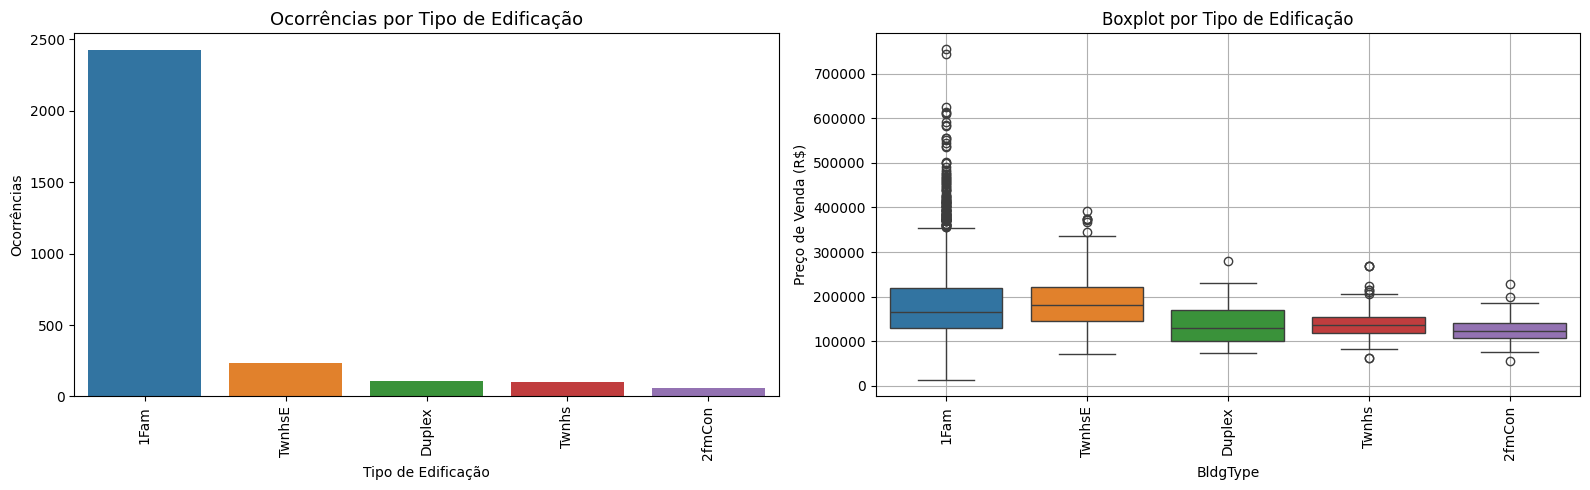

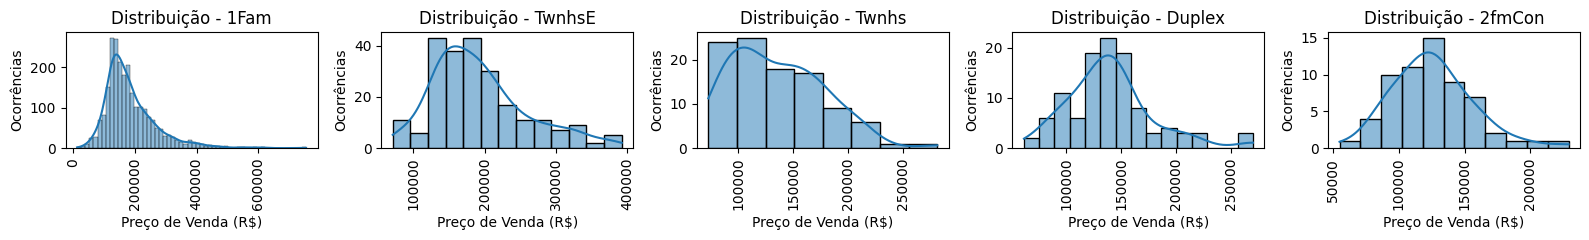

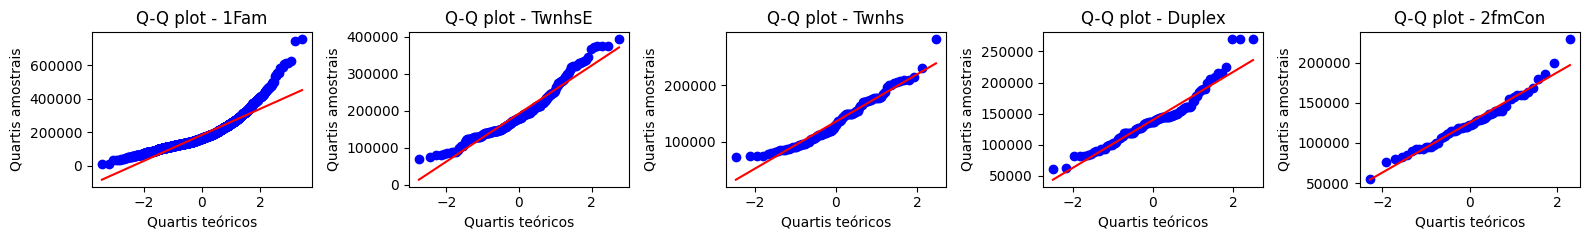

#### Shapiro - Tipo de Edificação

Shapiro-Wilk para a distribuição do tipo de edificação 1Fam:
Estatística=0.876, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do tipo de edificação TwnhsE:
Estatística=0.943, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do tipo de edificação Twnhs:
Estatística=0.953, p=0.001
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do tipo de edificação Duplex:
Estatística=0.932, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do tipo de edificação 2fmCon:
Estatística=0.970, p=0.136
Amostra parece ser normalmente distribuída (falha em rejeitar H0)


#### Kolmogorov-Smirnov - Tipo de Edificação

Kolmogorov-Smirnov para a distribuição do tipo de edificação 1Fam:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do tipo de edificação TwnhsE:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do tipo de edificação Twnhs:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do tipo de edificação Duplex:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do tipo de edificação 2fmCon:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)


In [101]:
display(Markdown(f"""
Building Type ou Tipo de Edificação normalmente descreve o tipo de edificação residencial, classificando as propriedades de acordo com a sua configuração estrutural. No contexto de conjuntos de dados imobiliários — como o famoso conjunto “Ames Housing” — essa variável costuma indicar o arranjo das unidades habitacionais em relação umas às outras. Exemplos comuns incluem:
"""))

df_counts = df['BldgType'].value_counts(dropna=False).to_frame().rename(columns={'count':'Ocorrências'})
nulos = df['BldgType'].isna().sum()

display(Markdown(f"""
**Tipo de Variável**: Categórica Ordinal
"""))

display(Markdown(f"""
**Ocorrências por Tipo de Edificação**
"""))
display(df_counts)

display(Markdown(f"""
**1Fam (Single-Family Detached ou  Habitação Unifamiliar Isolada):**
Uma casa unifamiliar isolada, sem paredes compartilhadas com outras residências. Geralmente é um imóvel independente construído em um único lote, oferecendo maior privacidade e controle sobre o espaço externo.

**2FmCon (Two-Family Conversion ou Habitação Bifamiliar Convertida):**
Originalmente uma única residência que foi convertida em duas unidades de moradia independentes, geralmente com entradas separadas. Pode ter sido uma casa grande dividida internamente para acomodar duas famílias.

**Duplx (Duplex ou Habitação Bifamiliar (Duplex)):**
Uma construção projetada desde o início para abrigar duas unidades residenciais, uma ao lado da outra ou uma acima da outra, mantendo certa simetria e estrutura pensada para uso duplo desde o planejamento inicial.

**TwnhsE (Townhouse End Unit ou Moradia em Banda (Unidade de Extremidade)):**
Uma unidade de casa geminada localizada nas extremidades da fileira. Assim, ela compartilha apenas uma parede comum com a unidade vizinha e possui geralmente uma área externa maior ou mais diferenciada em um dos lados.

**TwnhsI (Townhouse Inside Unit ou Moradia em Banda (Unidade Interna)):**
Uma unidade de casa geminada localizada no meio da fileira, compartilhando paredes com as propriedades vizinhas em ambos os lados. Essas unidades, por estarem entre duas outras, costumam ter menos janelas laterais e menor exposição externa, se comparadas às unidades de extremidade.
"""))

###########################################################################
# gráficos de distribuição
###########################################################################
fig, ax = plt.subplots(1, 2, figsize=default_figsize)

# Subplot 1: histograma
plt.subplot(1, 2, 1)
sns.barplot(x='BldgType', y='Ocorrências', data=df_counts, ax=ax[0], hue='BldgType')
plt.title(r'Ocorrências por Tipo de Edificação', fontsize=13)
plt.xlabel(r"Tipo de Edificação")
plt.ylabel('Ocorrências')
plt.xticks(rotation=90)

# # Subplot 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='BldgType', y='SalePrice', data=df, ax=ax[1], hue='BldgType')
plt.title('Boxplot por Tipo de Edificação')
plt.ylabel('Preço de Venda (R$)')
plt.xlabel('BldgType')
plt.xticks(ticks=range(len(df_counts.index)), labels=df_counts.index, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()



###########################################################################
# imprimir o histograma e distribuição de cada categoria
###########################################################################
top = df['BldgType'].drop_duplicates().to_list()
total_cat = len(top)

fig, ax = plt.subplots(1, total_cat, figsize=default_figsize_small)

for i, categoria in enumerate(top):
    plt.subplot(1, total_cat, i+1)
    sns.histplot(df[df['BldgType'] == categoria]['SalePrice'], kde=True)
    plt.title(f'Distribuição - {categoria}')
    plt.xlabel('Preço de Venda (R$)')
    plt.ylabel('Ocorrências')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# fazer o qq plot para cada um dos top bairros selecionados
fig, ax = plt.subplots(1, total_cat, figsize=default_figsize_small)

for i, categoria in enumerate(top):
    plt.subplot(1, total_cat, i+1)
    df_tmp = df[df['BldgType'] == categoria]
    stats.probplot(df_tmp['SalePrice'], dist="norm", plot=plt)
    plt.title(f'Q-Q plot - {categoria}')
    plt.xlabel('Quartis teóricos')
    plt.ylabel('Quartis amostrais')

plt.tight_layout()
plt.show()

# Teste de Shapiro-Wilk para cada um dos top bairros selecionados
display(Markdown('#### Shapiro - Tipo de Edificação'))
for categoria in top:
    s, p = shapiro(df[df['BldgType'] == categoria]['SalePrice'])
    print(f'Shapiro-Wilk para a distribuição do tipo de edificação {categoria}:')
    print(f'Estatística={s:.3f}, p={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
    else:
        print('Amostra não parece ser normalmente distribuída (rejeita H0)')


# Teste de Kolmogorov-Smirnov para cada um dos top bairros selecionados
display(Markdown('#### Kolmogorov-Smirnov - Tipo de Edificação'))
for categoria in top:
    s, p = stats.kstest(df[df['BldgType'] == categoria]['SalePrice'], 'norm')
    print(f'Kolmogorov-Smirnov para a distribuição do tipo de edificação {categoria}:')
    print(f'Estatística={s:.3f}, p={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
    else:
        print('Amostra não parece ser normalmente distribuída (rejeita H0)')

# ANOVA

## Verificação dos Pressupostos da ANOVA

### Observações Independentes

Assumimos que cada casa/venda é independente das outras.

### Variável dependente deve ser contínua

O preço de venda é uma variável contínua.

### Ausência de Outliers

#### Bairro

Os gráficos de boxplot mostram que existem outliers em diversos bairros.

#### Inclinação do Terreno

O gráfico de boxplot mostra que existem outliers em 2 das 3 inclinações do terreno.

#### Tipo de Edificação

O gráfico de boxplot mostra que existem outliers em todos os tipos de edificação.

### Normalidade dos Resíduos

#### Bairro

Tabela ANOVA

,sum_sq,df,F,PR(>F)
Neighborhood,1.917418e+12,4.0,230.898961,2.460468e-150
Residual,2.740367e+12,1320.0,NaN,NaN


Sumário ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
Neighborhood,4.0,1.917418e+12,4.793544e+11,230.898961,2.460468e-150
Residual,1320.0,2.740367e+12,2.076035e+09,NaN,NaN


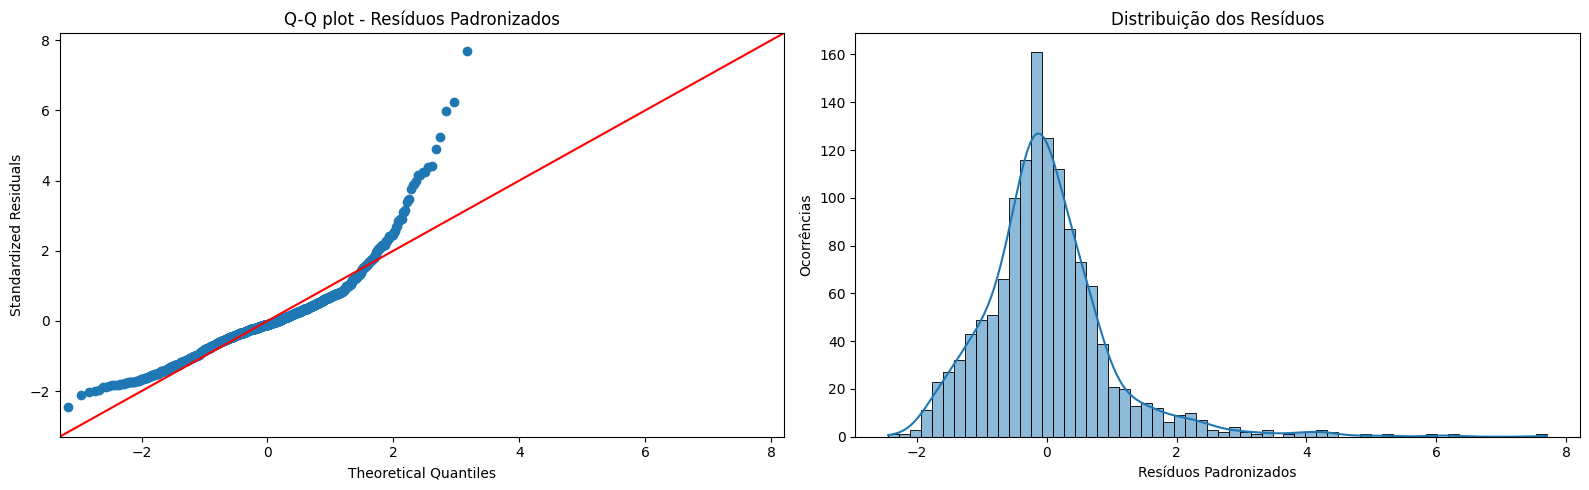

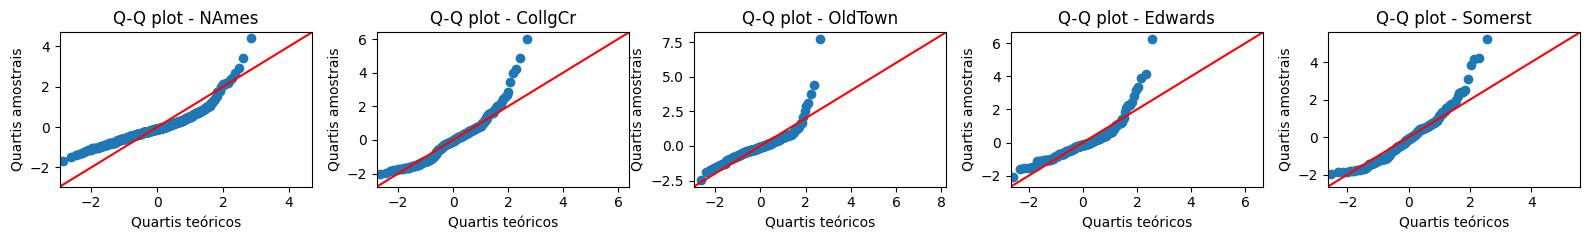

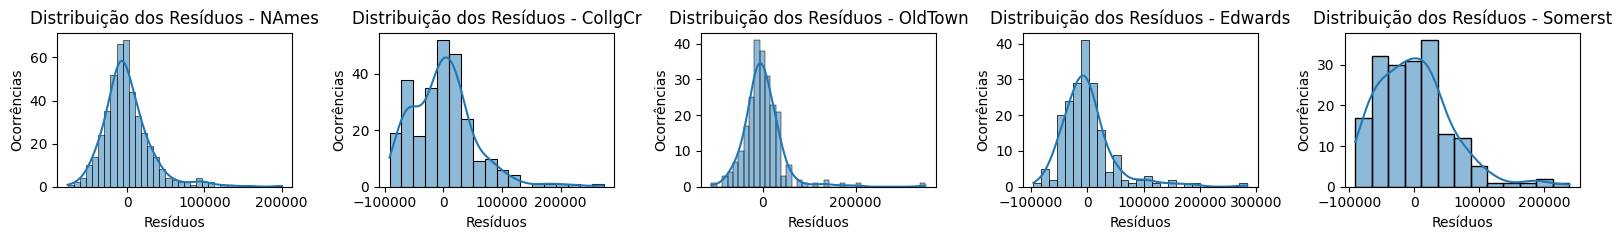

Shapiro-Wilk para a distribuição dos resíduos:

Estatística=0.892, p=0.000

Amostra não parece ser normalmente distribuída (rejeita H0)

Shapiro-Wilk para a distribuição dos resíduos do bairro NAmes:

Estatística=0.893, p=0.000

Amostra não parece ser normalmente distribuída (rejeita H0)

Shapiro-Wilk para a distribuição dos resíduos do bairro CollgCr:

Estatística=0.928, p=0.000

Amostra não parece ser normalmente distribuída (rejeita H0)

Shapiro-Wilk para a distribuição dos resíduos do bairro OldTown:

Estatística=0.800, p=0.000

Amostra não parece ser normalmente distribuída (rejeita H0)

Shapiro-Wilk para a distribuição dos resíduos do bairro Edwards:

Estatística=0.837, p=0.000

Amostra não parece ser normalmente distribuída (rejeita H0)

Shapiro-Wilk para a distribuição dos resíduos do bairro Somerst:

Estatística=0.939, p=0.000

Amostra não parece ser normalmente distribuída (rejeita H0)

In [102]:
# Melting the filtered data for analysis in the OLS model
melted_data_for_ols = pd.melt(df[df['Neighborhood'].isin(top_bairros)], id_vars=['Neighborhood'], value_vars=['SalePrice'])

# Ordinary Least Squares (OLS) model
model = ols('value ~ Neighborhood', data=melted_data_for_ols).fit()

# Performing ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Displaying the ANOVA table
display(Markdown(f"""Tabela ANOVA"""))
display(anova_table)

display(Markdown(f"""Sumário ANOVA"""))
res = stat()
res.anova_stat(df=melted_data_for_ols, res_var='value', anova_model='value ~ Neighborhood')
display(res.anova_summary)

# Q-Q plot geral dos residuos e distribuição geral dos residuos
fig, ax = plt.subplots(1, 2, figsize=default_figsize)

# Q-Q plot dos resíduos
plt.subplot(1, 2, 1)
sm.qqplot(res.anova_std_residuals, line='45', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title("Q-Q plot - Resíduos Padronizados")

# Distribuição dos resíduos
plt.subplot(1, 2, 2)
sns.histplot(res.anova_std_residuals, kde=True, ax=ax[1])
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos Padronizados')
plt.ylabel('Ocorrências')

plt.tight_layout()
plt.show()

# qqplot dos resíduos para cada bairro
fig, ax = plt.subplots(1, 5, figsize=default_figsize_small)

for i, categoria in enumerate(top_bairros):
    plt.subplot(1, 5, i+1)
    sm.qqplot(res.anova_std_residuals[melted_data_for_ols['Neighborhood'] == categoria], line='45', ax=ax[i])
    plt.title(f'Q-Q plot - {categoria}')
    plt.xlabel('Quartis teóricos')
    plt.ylabel('Quartis amostrais')
plt.tight_layout()

# plotar a distribuição dos residuos para cada bairro
fig, ax = plt.subplots(1, 5, figsize=default_figsize_small)

for i, categoria in enumerate(top_bairros):
    plt.subplot(1, 5, i+1)
    sns.histplot(res.anova_model_out.resid[melted_data_for_ols['Neighborhood'] == categoria], kde=True)
    plt.title(f'Distribuição dos Resíduos - {categoria}')
    plt.xlabel('Resíduos')
    plt.ylabel('Ocorrências')
plt.tight_layout()

plt.show()


# Teste de Shapiro-Wilk para os resíduos
s, p = shapiro(res.anova_model_out.resid)
display(Markdown('Shapiro-Wilk para a distribuição dos resíduos:'))
display(Markdown('Estatística=%.3f, p=%.3f' % (s, p)))
alpha = 0.05
if p > alpha:
    display(Markdown('Amostra parece ser normalmente distribuída (falha em rejeitar H0)'))
else:
    display(Markdown('Amostra não parece ser normalmente distribuída (rejeita H0)'))

# Teste de normalidade dos resíduos para cada bairro
for categoria in top_bairros:
    s, p = shapiro(res.anova_model_out.resid[melted_data_for_ols['Neighborhood'] == categoria])
    display(Markdown(f'Shapiro-Wilk para a distribuição dos resíduos do bairro {categoria}:'))
    display(Markdown(f'Estatística={s:.3f}, p={p:.3f}'))
    alpha = 0.05
    if p > alpha:
        display(Markdown('Amostra parece ser normalmente distribuída (falha em rejeitar H0)'))
    else:
        display(Markdown('Amostra não parece ser normalmente distribuída (rejeita H0)'))

#### Inclinação do Terreno


Tabela ANOVA

,sum_sq,df,F,PR(>F)
LandSlope,8.787033e+10,2.0,6.912149,0.001012
Residual,1.860467e+13,2927.0,NaN,NaN


Sumário ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
LandSlope,2.0,8.787033e+10,4.393516e+10,6.912149,0.001012
Residual,2927.0,1.860467e+13,6.356224e+09,NaN,NaN


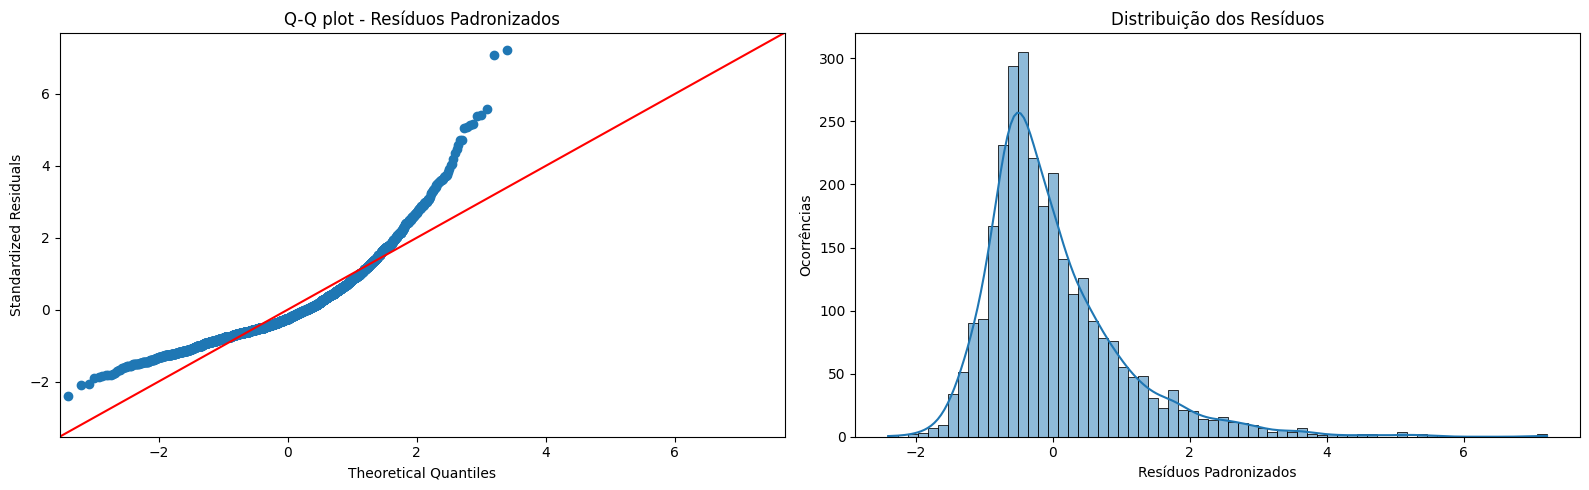

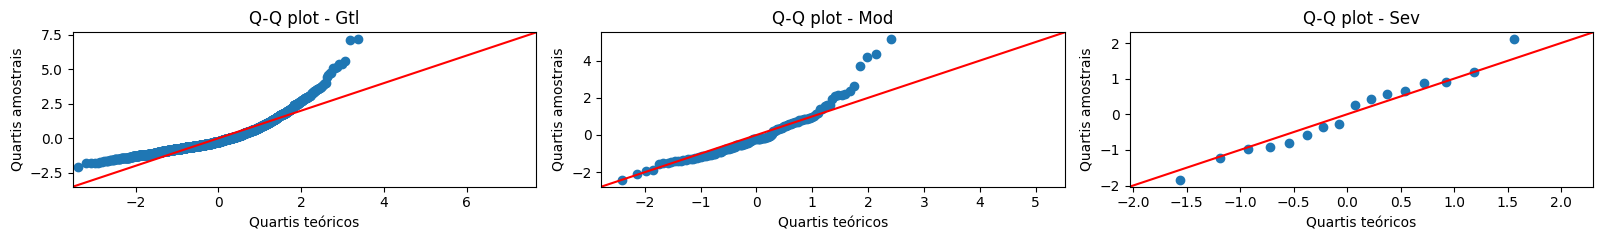

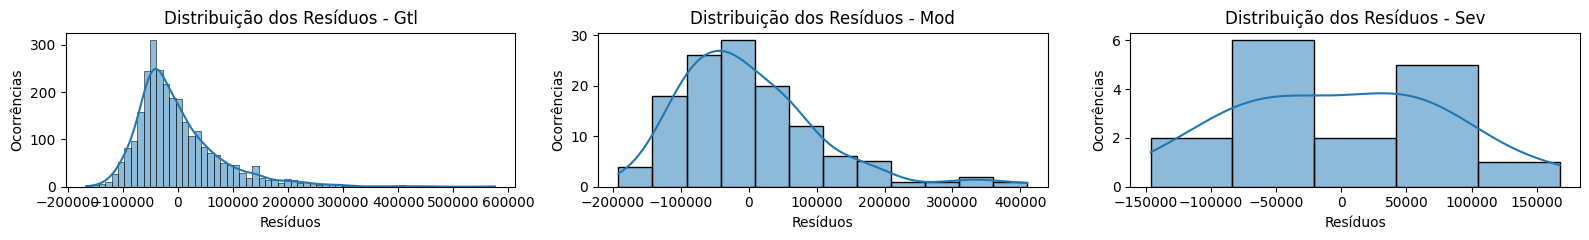

Shapiro-Wilk para a distribuição dos resíduos:

Estatística=0.879, p=0.000

Amostra não parece ser normalmente distribuída (rejeita H0)

Shapiro-Wilk para a distribuição dos resíduos da inclinação Gtl:

Estatística=0.874, p=0.000

Amostra não parece ser normalmente distribuída (rejeita H0)

Shapiro-Wilk para a distribuição dos resíduos da inclinação Mod:

Estatística=0.913, p=0.000

Amostra não parece ser normalmente distribuída (rejeita H0)

Shapiro-Wilk para a distribuição dos resíduos da inclinação Sev:

Estatística=0.979, p=0.951

Amostra parece ser normalmente distribuída (falha em rejeitar H0)

In [103]:
top = df['LandSlope'].value_counts().index.to_list()
total_cat = len(top)
# Melting the filtered data for analysis in the OLS model
melted_data_for_ols = pd.melt(df, id_vars=['LandSlope'], value_vars=['SalePrice'])

# Ordinary Least Squares (OLS) model
model = ols('value ~ LandSlope', data=melted_data_for_ols).fit()

# Performing ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Displaying the ANOVA table
display(Markdown(f"""Tabela ANOVA"""))
display(anova_table)

display(Markdown(f"""Sumário ANOVA"""))
res = stat()
res.anova_stat(df=melted_data_for_ols, res_var='value', anova_model='value ~ LandSlope')
display(res.anova_summary)

# Q-Q plot geral dos residuos e distribuição geral dos residuos
fig, ax = plt.subplots(1, 2, figsize=default_figsize)

# Q-Q plot dos resíduos
plt.subplot(1, 2, 1)
sm.qqplot(res.anova_std_residuals, line='45', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title("Q-Q plot - Resíduos Padronizados")

# Distribuição dos resíduos
plt.subplot(1, 2, 2)
sns.histplot(res.anova_std_residuals, kde=True, ax=ax[1])
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos Padronizados')
plt.ylabel('Ocorrências')

plt.tight_layout()
plt.show()

# qqplot dos resíduos para cada inclinação
fig, ax = plt.subplots(1, total_cat, figsize=default_figsize_small)

for i, categoria in enumerate(top):
    plt.subplot(1, total_cat, i+1)
    sm.qqplot(res.anova_std_residuals[melted_data_for_ols['LandSlope'] == categoria], line='45', ax=ax[i])
    plt.title(f'Q-Q plot - {categoria}')
    plt.xlabel('Quartis teóricos')
    plt.ylabel('Quartis amostrais')
plt.tight_layout()

# plotar a distribuição dos residuos para cada inclinação
fig, ax = plt.subplots(1, total_cat, figsize=default_figsize_small)

for i, categoria in enumerate(top):
    plt.subplot(1, total_cat, i+1)
    sns.histplot(res.anova_model_out.resid[melted_data_for_ols['LandSlope'] == categoria], kde=True)
    plt.title(f'Distribuição dos Resíduos - {categoria}')
    plt.xlabel('Resíduos')
    plt.ylabel('Ocorrências')
plt.tight_layout()

plt.show()

# Teste de Shapiro-Wilk para os resíduos
s, p = shapiro(res.anova_model_out.resid)
display(Markdown('Shapiro-Wilk para a distribuição dos resíduos:'))
display(Markdown('Estatística=%.3f, p=%.3f' % (s, p)))
alpha = 0.05
if p > alpha:
    display(Markdown('Amostra parece ser normalmente distribuída (falha em rejeitar H0)'))
else:
    display(Markdown('Amostra não parece ser normalmente distribuída (rejeita H0)'))

# Teste de normalidade dos resíduos para cada inclinação
for categoria in top:
    s, p = shapiro(res.anova_model_out.resid[melted_data_for_ols['LandSlope'] == categoria])
    display(Markdown(f'Shapiro-Wilk para a distribuição dos resíduos da inclinação {categoria}:'))
    display(Markdown(f'Estatística={s:.3f}, p={p:.3f}'))
    alpha = 0.05
    if p > alpha:
        display(Markdown('Amostra parece ser normalmente distribuída (falha em rejeitar H0)'))
    else:
        display(Markdown('Amostra não parece ser normalmente distribuída (rejeita H0)'))


#### Tipo de Edificação

Tabela ANOVA

,sum_sq,df,F,PR(>F)
BldgType,6.454111e+11,4.0,26.151358,2.475923e-21
Residual,1.804713e+13,2925.0,NaN,NaN


Sumário ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
BldgType,4.0,6.454111e+11,1.613528e+11,26.151358,2.475923e-21
Residual,2925.0,1.804713e+13,6.169958e+09,NaN,NaN


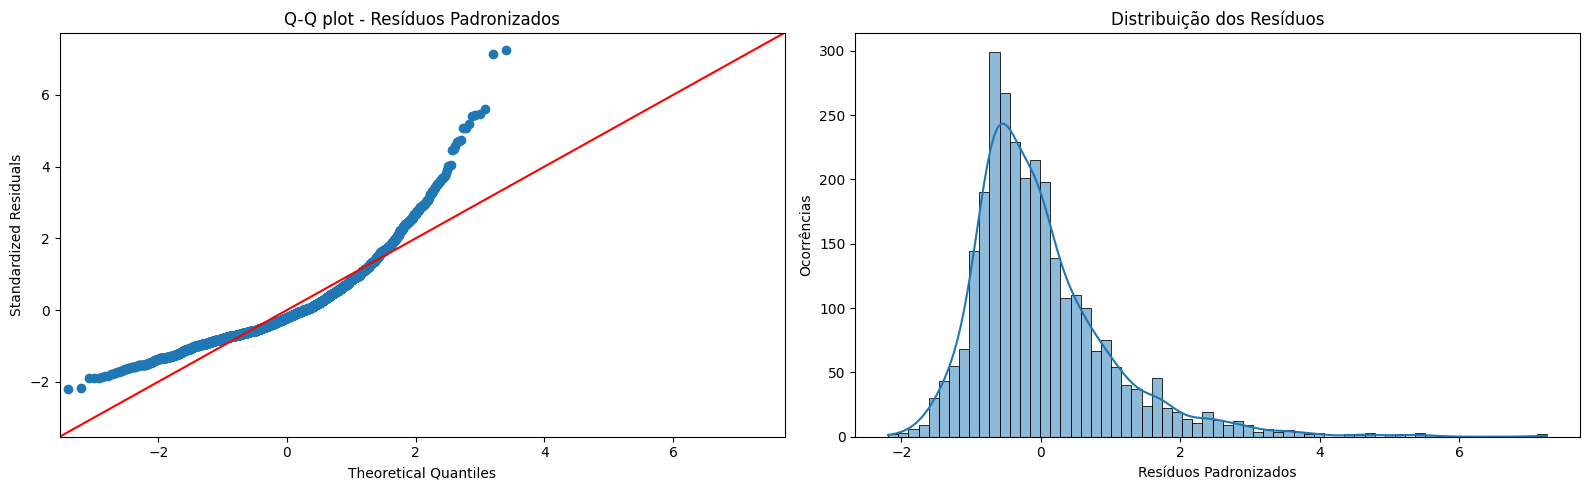

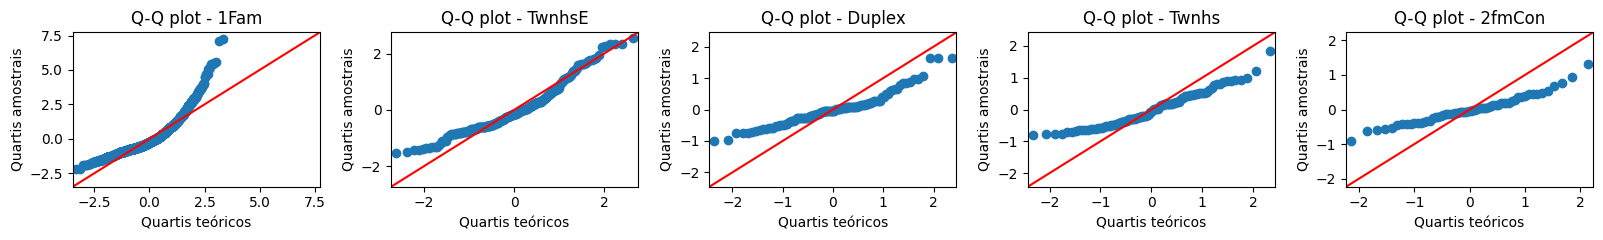

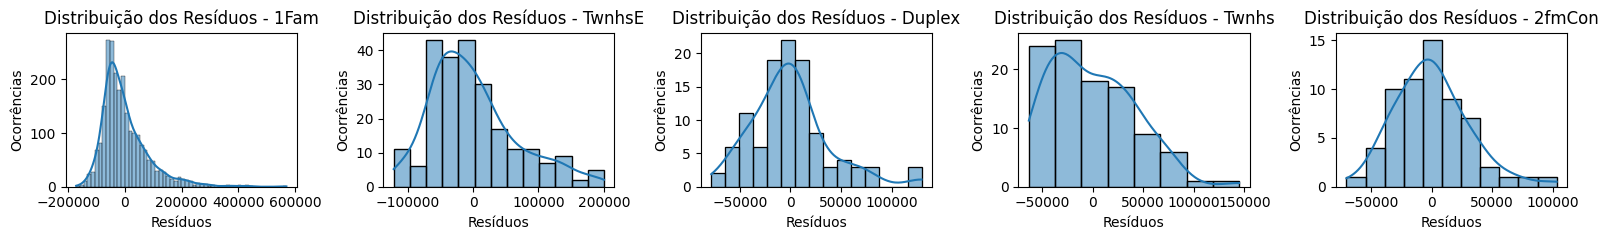

Shapiro-Wilk para a distribuição dos resíduos:

Estatística=0.882, p=0.000

Amostra não parece ser normalmente distribuída (rejeita H0)

Shapiro-Wilk para a distribuição dos resíduos do tipo de edificação 1Fam:

Estatística=0.876, p=0.000

Amostra não parece ser normalmente distribuída (rejeita H0)

Shapiro-Wilk para a distribuição dos resíduos do tipo de edificação TwnhsE:

Estatística=0.943, p=0.000

Amostra não parece ser normalmente distribuída (rejeita H0)

Shapiro-Wilk para a distribuição dos resíduos do tipo de edificação Duplex:

Estatística=0.932, p=0.000

Amostra não parece ser normalmente distribuída (rejeita H0)

Shapiro-Wilk para a distribuição dos resíduos do tipo de edificação Twnhs:

Estatística=0.953, p=0.001

Amostra não parece ser normalmente distribuída (rejeita H0)

Shapiro-Wilk para a distribuição dos resíduos do tipo de edificação 2fmCon:

Estatística=0.970, p=0.136

Amostra parece ser normalmente distribuída (falha em rejeitar H0)

In [104]:
top = df['BldgType'].value_counts().index.to_list()
total_cat = len(top)
# Melting the filtered data for analysis in the OLS model
melted_data_for_ols = pd.melt(df, id_vars=['BldgType'], value_vars=['SalePrice'])

# Ordinary Least Squares (OLS) model
model = ols('value ~ BldgType', data=melted_data_for_ols).fit()

# Performing ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Displaying the ANOVA table
display(Markdown(f"""Tabela ANOVA"""))
display(anova_table)

display(Markdown(f"""Sumário ANOVA"""))
res = stat()
res.anova_stat(df=melted_data_for_ols, res_var='value', anova_model='value ~ BldgType')
display(res.anova_summary)

# Q-Q plot geral dos residuos e distribuição geral dos residuos
fig, ax = plt.subplots(1, 2, figsize=default_figsize)

# Q-Q plot dos resíduos
plt.subplot(1, 2, 1)
sm.qqplot(res.anova_std_residuals, line='45', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title("Q-Q plot - Resíduos Padronizados")

# Distribuição dos resíduos
plt.subplot(1, 2, 2)
sns.histplot(res.anova_std_residuals, kde=True, ax=ax[1])
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos Padronizados')
plt.ylabel('Ocorrências')

plt.tight_layout()
plt.show()

# qqplot dos resíduos para cada tipo de edificação
fig, ax = plt.subplots(1, total_cat, figsize=default_figsize_small)

for i, categoria in enumerate(top):
    plt.subplot(1, total_cat, i+1)
    sm.qqplot(res.anova_std_residuals[melted_data_for_ols['BldgType'] == categoria], line='45', ax=ax[i])
    plt.title(f'Q-Q plot - {categoria}')
    plt.xlabel('Quartis teóricos')
    plt.ylabel('Quartis amostrais')
plt.tight_layout()

# plotar a distribuição dos residuos para cada tipo de edificação
fig, ax = plt.subplots(1, total_cat, figsize=default_figsize_small)

for i, categoria in enumerate(top):
    plt.subplot(1, total_cat, i+1)
    sns.histplot(res.anova_model_out.resid[melted_data_for_ols['BldgType'] == categoria], kde=True)
    plt.title(f'Distribuição dos Resíduos - {categoria}')
    plt.xlabel('Resíduos')
    plt.ylabel('Ocorrências')
plt.tight_layout()

plt.show()

# Teste de Shapiro-Wilk para os resíduos
s, p = shapiro(res.anova_model_out.resid)
display(Markdown('Shapiro-Wilk para a distribuição dos resíduos:'))
display(Markdown('Estatística=%.3f, p=%.3f' % (s, p)))
alpha = 0.05
if p > alpha:
    display(Markdown('Amostra parece ser normalmente distribuída (falha em rejeitar H0)'))
else:
    display(Markdown('Amostra não parece ser normalmente distribuída (rejeita H0)'))

# Teste de normalidade dos resíduos para cada tipo de edificação
for categoria in top:
    s, p = shapiro(res.anova_model_out.resid[melted_data_for_ols['BldgType'] == categoria])
    display(Markdown(f'Shapiro-Wilk para a distribuição dos resíduos do tipo de edificação {categoria}:'))
    display(Markdown(f'Estatística={s:.3f}, p={p:.3f}'))
    alpha = 0.05
    if p > alpha:
        display(Markdown('Amostra parece ser normalmente distribuída (falha em rejeitar H0)'))
    else:
        display(Markdown('Amostra não parece ser normalmente distribuída (rejeita H0)'))


### Homogeneidade de Variâncias

#### Bairro

In [105]:
md = r""""""
alpha = 0.05

# Separar os grupos
df_tmp = df[df['Neighborhood'].isin(top_bairros)]
grouped_data = [group['SalePrice'].values for name, group in df_tmp.groupby('Neighborhood')]

# Teste de Levene
levene_test = stats.levene(*grouped_data)
md += f'Estatística de Levene: {levene_test.statistic:.3f}, Valor-p: {levene_test.pvalue:.3e} \n\n'
if levene_test.pvalue > alpha:
    md += 'Falha em rejeitar H0: Variâncias iguais (Levene) \n\n'
else:
    md += 'Rejeita H0: Variâncias diferentes (Levene) \n\n'

# Teste de Brown-Forsythe
bf_test = stats.fligner(*grouped_data)
md += f'Estatística de Brown-Forsythe: {bf_test.statistic:.3f}, Valor-p: {bf_test.pvalue:.3e} \n\n'
if bf_test.pvalue > alpha:
    md += 'Falha em rejeitar H0: Variâncias iguais (Brown-Forsythe) \n\n'
else:
    md += 'Rejeita H0: Variâncias diferentes (Brown-Forsythe) \n\n'

display(Markdown(md))


Estatística de Levene: 21.504, Valor-p: 3.324e-17 

Rejeita H0: Variâncias diferentes (Levene) 

Estatística de Brown-Forsythe: 112.700, Valor-p: 1.932e-23 

Rejeita H0: Variâncias diferentes (Brown-Forsythe) 



#### Inclinação do Terreno

In [106]:
md = r""""""
alpha = 0.05

# Separar os grupos
grouped_data = [group['SalePrice'].values for name, group in df.groupby('LandSlope')]

# Teste de Levene
levene_test = stats.levene(*grouped_data)
md += f'Estatística de Levene: {levene_test.statistic:.3f}, Valor-p: {levene_test.pvalue:.3e} \n\n'
if levene_test.pvalue > alpha:
    md += 'Falha em rejeitar H0: Variâncias iguais (Levene) \n\n'
else:
    md += 'Rejeita H0: Variâncias diferentes (Levene) \n\n'

# Teste de Brown-Forsythe
bf_test = stats.fligner(*grouped_data)
md += f'Estatística de Brown-Forsythe: {bf_test.statistic:.3f}, Valor-p: {bf_test.pvalue:.3e} \n\n'
if bf_test.pvalue > alpha:
    md += 'Falha em rejeitar H0: Variâncias iguais (Brown-Forsythe) \n\n'
else:
    md += 'Rejeita H0: Variâncias diferentes (Brown-Forsythe) \n\n'

display(Markdown(md))

Estatística de Levene: 7.376, Valor-p: 6.376e-04 

Rejeita H0: Variâncias diferentes (Levene) 

Estatística de Brown-Forsythe: 20.958, Valor-p: 2.812e-05 

Rejeita H0: Variâncias diferentes (Brown-Forsythe) 



#### Tipo de Edificação

In [107]:
md = r""""""
alpha = 0.05

# Separar os grupos
grouped_data = [group['SalePrice'].values for name, group in df.groupby('BldgType')]

# Teste de Levene
levene_test = stats.levene(*grouped_data)
md += f'Estatística de Levene: {levene_test.statistic:.3f}, Valor-p: {levene_test.pvalue:.3e} \n\n'
if levene_test.pvalue > alpha:
    md += 'Falha em rejeitar H0: Variâncias iguais (Levene) \n\n'
else:
    md += 'Rejeita H0: Variâncias diferentes (Levene) \n\n'

# Teste de Brown-Forsythe
bf_test = stats.fligner(*grouped_data)
md += f'Estatística de Brown-Forsythe: {bf_test.statistic:.3f}, Valor-p: {bf_test.pvalue:.3e} \n\n'
if bf_test.pvalue > alpha:
    md += 'Falha em rejeitar H0: Variâncias iguais (Brown-Forsythe) \n\n'
else:
    md += 'Rejeita H0: Variâncias diferentes (Brown-Forsythe) \n\n'

display(Markdown(md))

Estatística de Levene: 15.511, Valor-p: 1.460e-12 

Rejeita H0: Variâncias diferentes (Levene) 

Estatística de Brown-Forsythe: 81.613, Valor-p: 7.929e-17 

Rejeita H0: Variâncias diferentes (Brown-Forsythe) 



Conclusões para todos os pressupostos avaliados:

- As observações são independentes
- A variável dependente é contínua
- Existem outliers em todas as variáveis independentes
- Os resíduos não são normalmente distribuídos
- As variâncias não são homogêneas

Devido à violação de pressupostos fundamentais, a ANOVA paramétrica não é apropriada. Portanto, devemos utilizar uma alternativa não paramétrica. Assim, utilizaremos o teste de Kruskal-Wallis para verificar se há diferença significativa entre os grupos.

In [88]:
# Tukey's HSD test
# df_top_bairros = df[df['Neighborhood'].isin(top)][['Neighborhood', 'SalePrice']].copy()
# tukey_test = sm.stats.multicomp.pairwise_tukeyhsd(df_top_bairros['SalePrice'], df_top_bairros['Neighborhood'], alpha=0.05)
# tukey_test.summary()
# dir(tukey_test)
# tukey_test.pvalues